## HELP NGO CASE STUDY (Bhargav Ram)

# Problem Statement 
**- HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.**

**- After the recent funding programmes, they have been able to raise around  10 million dollar . Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.** 

**- And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.**

### Analysis Approach 
1.Understanding the problem statement

2.collecting the data

3.reading the data

4.EDA

5.Preprocessing

- Outlier Treatment

- Scaling

6.Cluster Tendency Check: We need check if the data for clustering is actually having some visible clusters or not?**

- Hopkins Test

7.Find the value of K

- Business

- Silhouette

- SSD

8.Final KMean Analysis

- Kmeans with final value of K

9.Cluster Profiling

- We try to make sense out of various clusters

10.Hierarchical clustering

- single linkage

- complete linkage

- profiling

In [1]:
# import the libraries 
import numpy as np, matplotlib.pyplot as plt , pandas as pd 

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
#reading the dataset
df_1 = pd.read_csv("country-data.csv")
df_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# shape of data
df_1.shape

(167, 10)

In [4]:
# lets check the null values present 
df_1.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


**As there are not any null values , we can proceed for next step**

In [6]:
# checking duplicate values in country column
sum(df_1.duplicated(subset = 'country')) == 0

True

**No duplicate values** 

In [7]:
df_1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Data Cleaning

**According to data dictionary  exports , health , imports are given in % of gdp per capita 
lets convert into normal units.** 

In [8]:
df_1["exports"] = (df_1["exports"]*df_1["gdpp"])/100
df_1["health"] = (df_1["health"]*df_1["gdpp"])/100
df_1["imports"] = (df_1["imports"]*df_1["gdpp"])/100
df_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


#### EDA

In [9]:
df_1.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [10]:
box_1 = df_1.drop(["country"],axis=1)
box_1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


<Figure size 4320x1296 with 0 Axes>

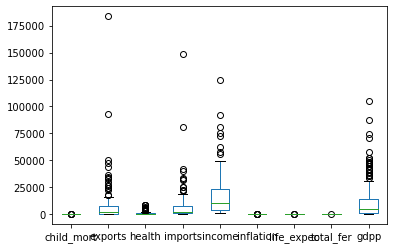

In [11]:
plt.figure(figsize=(60,18))
box_1.plot(kind='box')
plt.show()

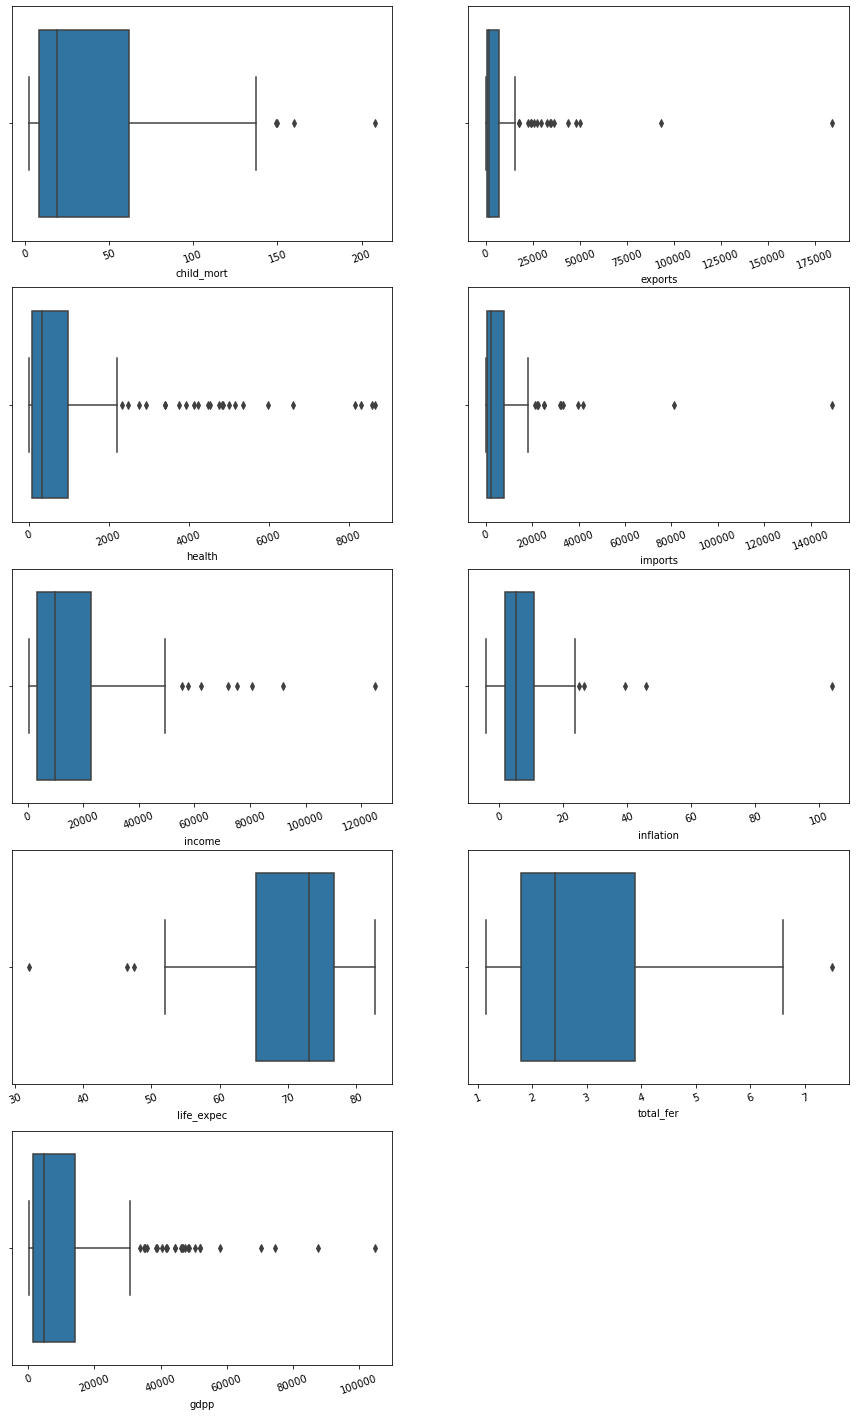

In [12]:
plt.figure(figsize=(15,25))
for i in enumerate(box_1):
    ax = plt.subplot(5, 2, i[0]+1)
    sns.boxplot(df_1[i[1]])
    plt.xticks(rotation = 20)
plt.show()

These boxplot clearly shows the outliers present , as we are not dropping or changing the outliers as it can manipulate our results 

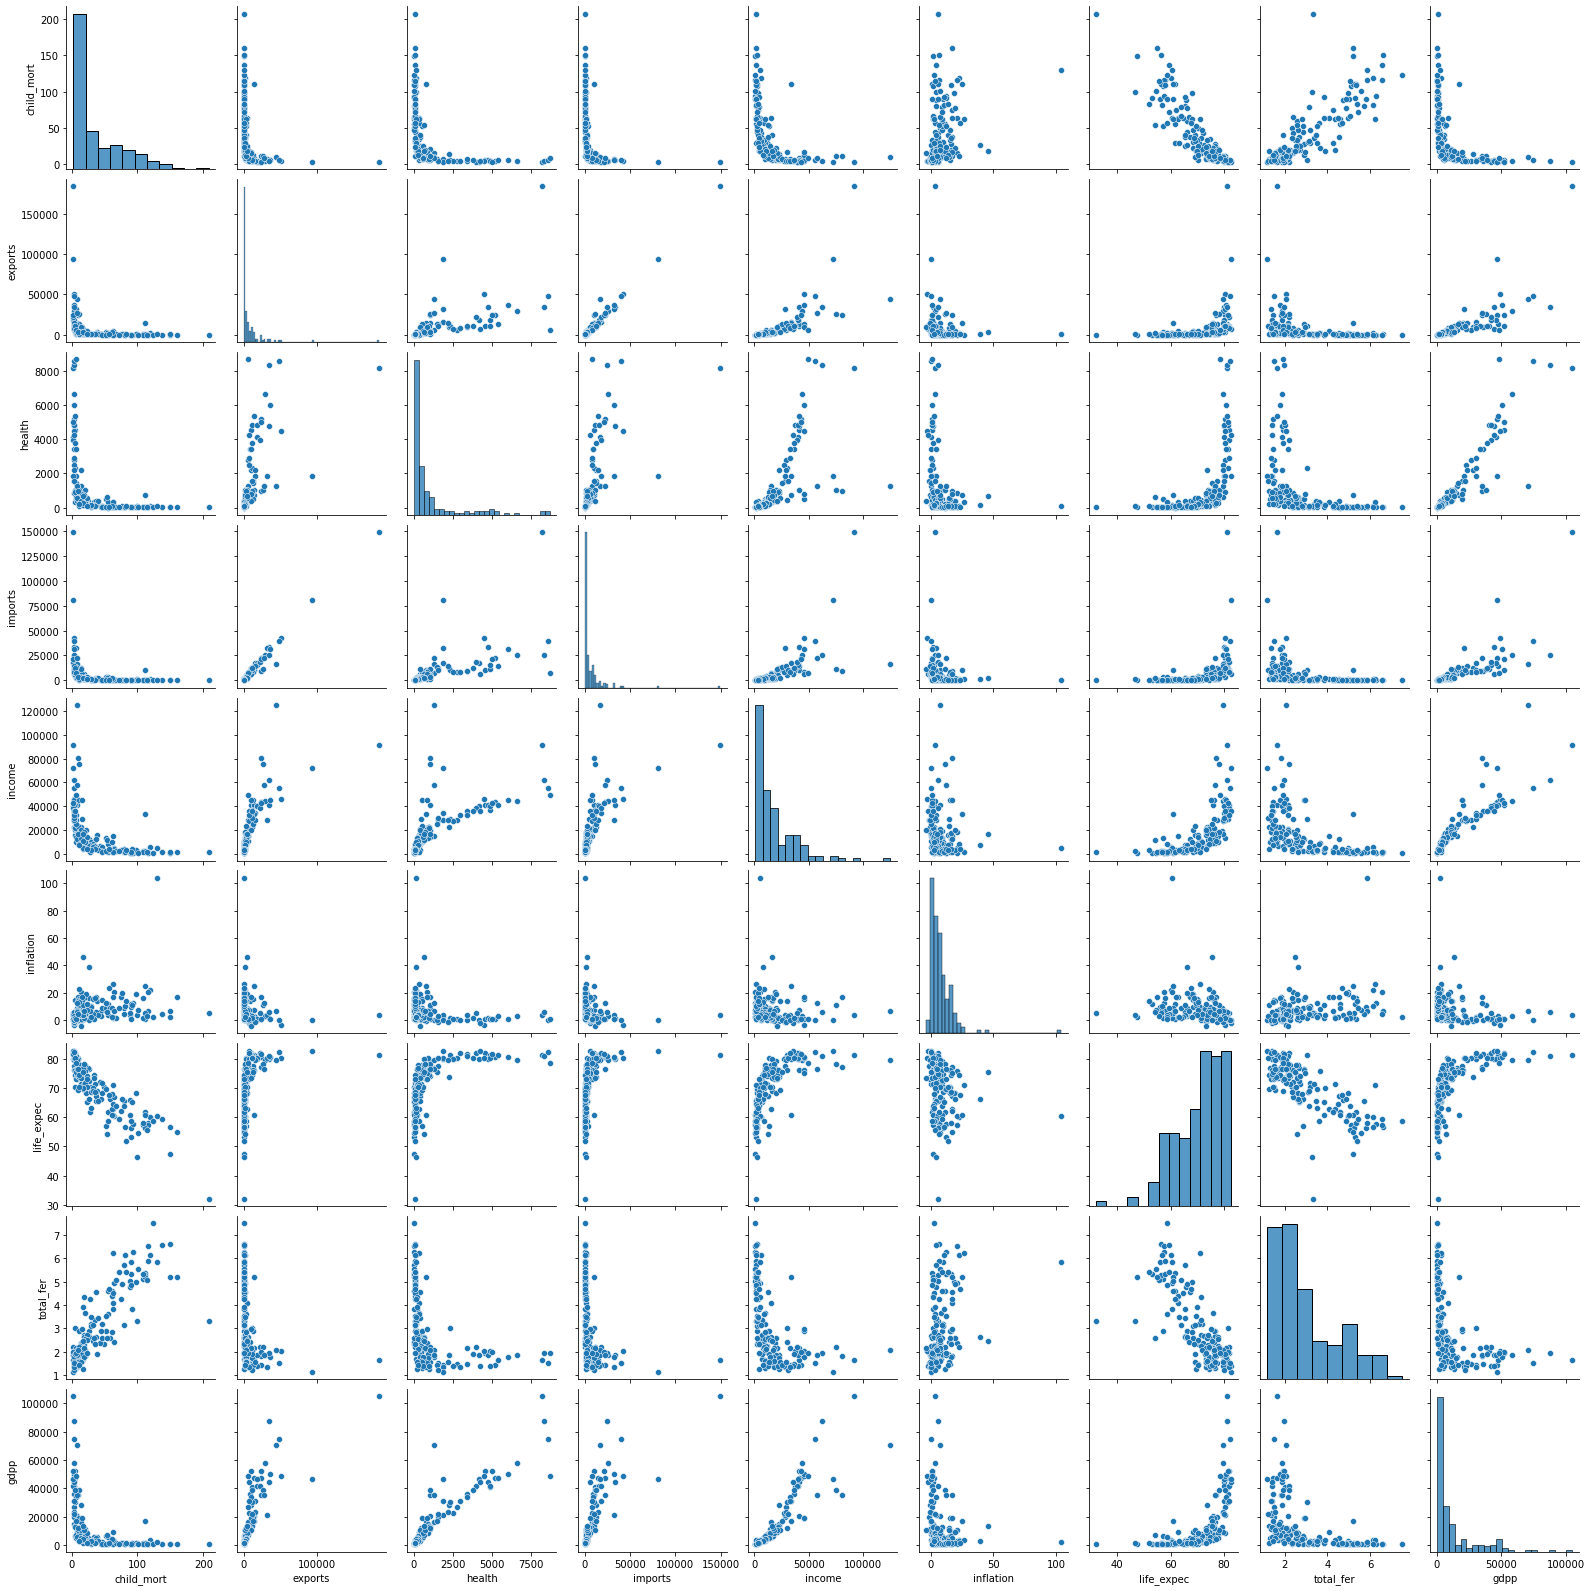

In [13]:
sns.pairplot(df_1)
plt.show()

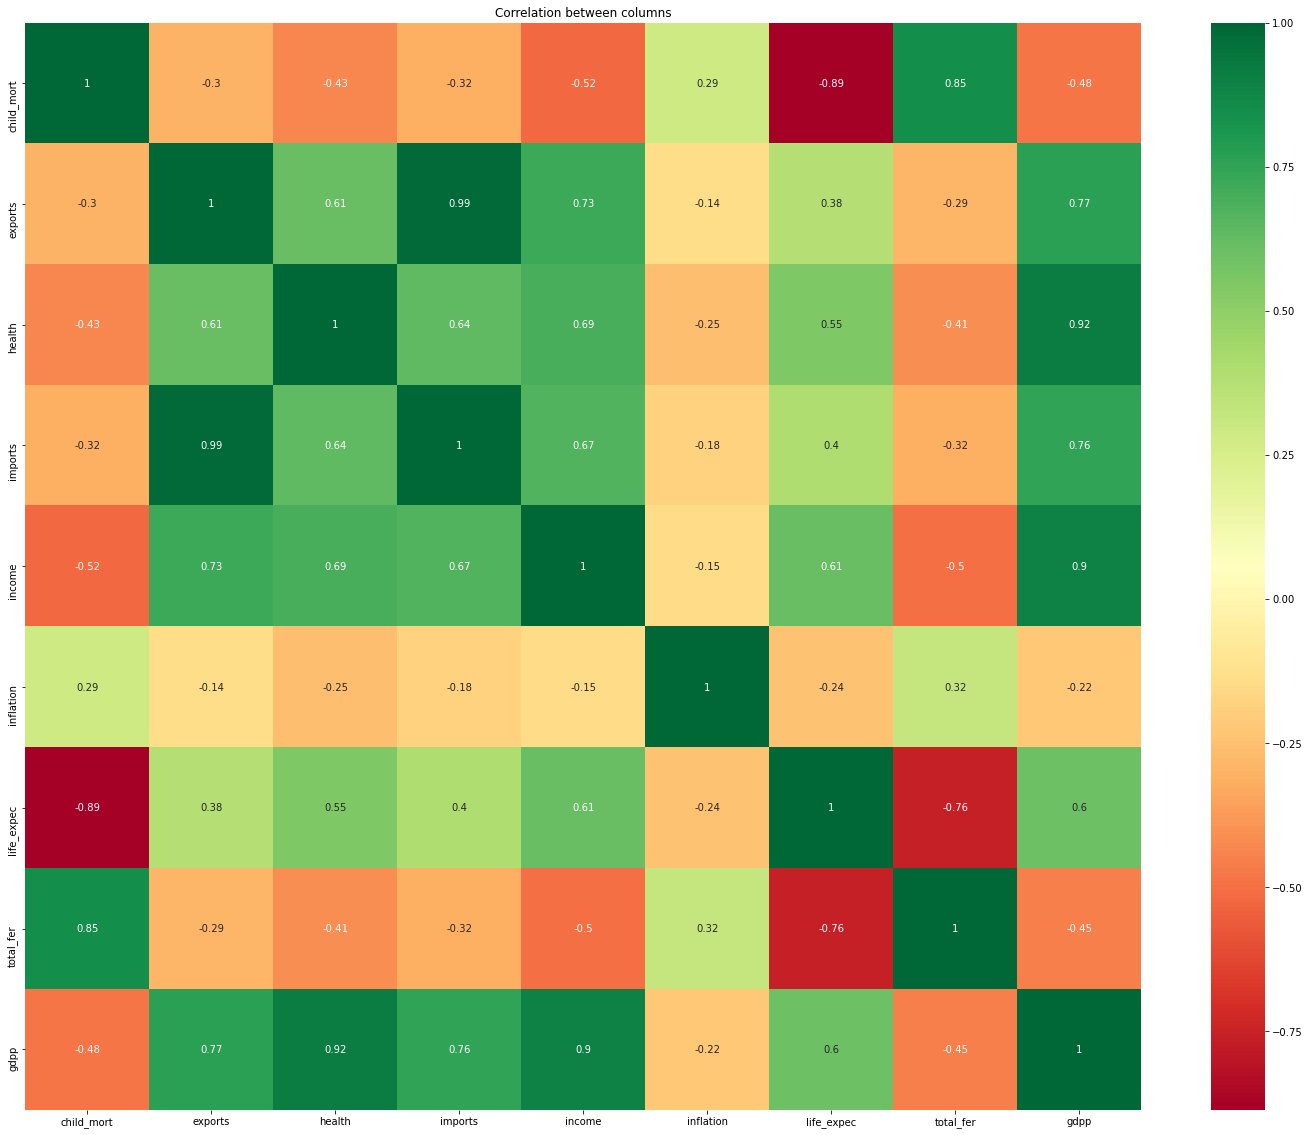

In [14]:
plt.figure(figsize=(25, 20))
sns.heatmap(df_1.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between columns")
plt.show()

here we can see co-relation between columns, as clustering is not effected by corelation between columns we can work with there columns

#### Scalling the data 

In [15]:
# scaling the data 
# creating a standart scaller
scaler = StandardScaler()

# scale this variable using fit transform 
df_scaled = scaler.fit_transform(box_1)
df_scaled.shape

(167, 9)

In [16]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


#### Hopkins test 

In [17]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [18]:
hopkins(box_1)

0.9845859043322398

the data looks good for clustering 

#### K-means clustering 

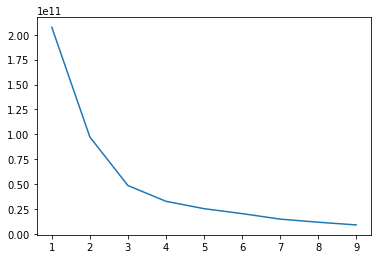

In [19]:
# Elbow Curve
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(box_1)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

There is a elbow curve on values 2,3 and 4

we will be using silhoutte score to determine the optimal number of k.

In [20]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(box_1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(box_1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.712586926709893
For n_clusters=3, the silhouette score is 0.7010999403856036
For n_clusters=4, the silhouette score is 0.6529496469879722
For n_clusters=5, the silhouette score is 0.5305640500641023
For n_clusters=6, the silhouette score is 0.5392278453918127
For n_clusters=7, the silhouette score is 0.5339607116039059
For n_clusters=8, the silhouette score is 0.5373642116459425


In [21]:
# initializing k-means
kmeans = KMeans(n_clusters=5, max_iter=100 , random_state = 100)
kmeans.fit(box_1)

KMeans(max_iter=100, n_clusters=5, random_state=100)

In [22]:
kmeans.labels_

array([4, 4, 4, 4, 0, 0, 4, 2, 2, 0, 0, 2, 4, 0, 0, 2, 4, 4, 4, 4, 4, 4,
       0, 2, 0, 4, 4, 4, 4, 2, 4, 4, 4, 0, 4, 4, 4, 4, 4, 0, 4, 0, 2, 0,
       2, 4, 4, 4, 4, 0, 4, 0, 4, 2, 2, 0, 4, 4, 2, 4, 0, 4, 4, 4, 4, 4,
       4, 0, 2, 4, 4, 0, 4, 1, 2, 2, 4, 2, 4, 0, 4, 4, 2, 4, 4, 0, 0, 4,
       4, 0, 0, 3, 4, 4, 4, 0, 4, 4, 2, 4, 0, 4, 4, 4, 0, 4, 4, 4, 4, 4,
       2, 2, 4, 4, 1, 2, 4, 0, 4, 4, 4, 0, 0, 1, 0, 0, 4, 4, 2, 4, 4, 0,
       4, 1, 0, 0, 4, 4, 0, 2, 4, 4, 4, 0, 2, 1, 4, 4, 4, 4, 4, 4, 4, 0,
       4, 4, 4, 2, 2, 2, 0, 4, 4, 0, 4, 4, 4])

In [23]:
df_km = pd.concat([df_1, pd.Series(kmeans.labels_)], axis = 1)
df_km.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_id']
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,4
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,4
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,4
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,4
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [24]:
df_km['cluster_id'].value_counts()

4    96
0    39
2    26
1     5
3     1
Name: cluster_id, dtype: int64

#### Visualizing the cluster 

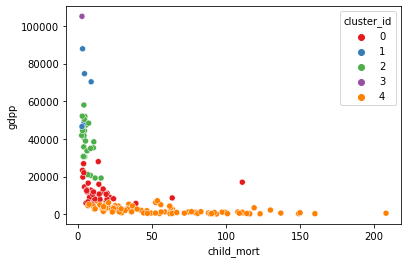

In [25]:
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')
plt.show()

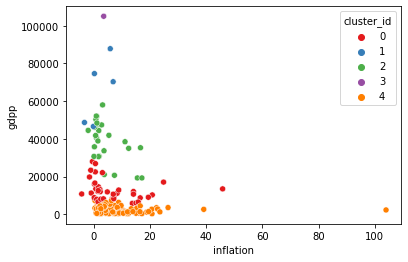

In [26]:
sns.scatterplot(x = 'inflation', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')
plt.show()

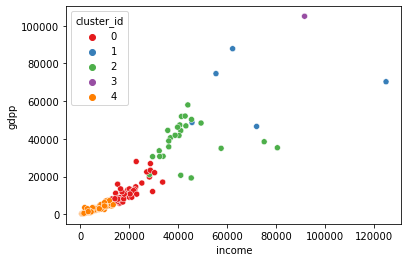

In [27]:
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')
plt.show()

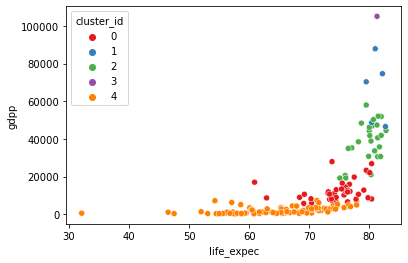

In [28]:
sns.scatterplot(x = 'life_expec', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')
plt.show()

 since we are getting 2 useless clusters we will go for the value K=3.

In [29]:
kmeans = KMeans(n_clusters=3, max_iter=100 , random_state = 100)
kmeans.fit(box_1)

KMeans(max_iter=100, n_clusters=3, random_state=100)

In [30]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0])

In [31]:
df_km1 = pd.concat([df_1, pd.Series(kmeans.labels_)], axis = 1)
df_km1.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_id']
df_km1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [32]:
df_km1['cluster_id'].value_counts()

0    129
2     36
1      2
Name: cluster_id, dtype: int64

#### K-means cluster visualization 

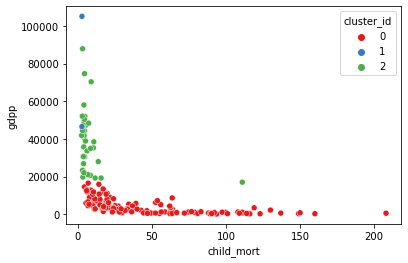

In [33]:
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df_km1, palette='Set1')
plt.show()

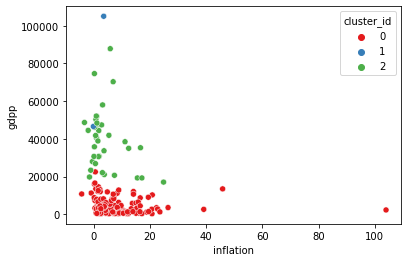

In [34]:
sns.scatterplot(x = 'inflation', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df_km1, palette='Set1')
plt.show()

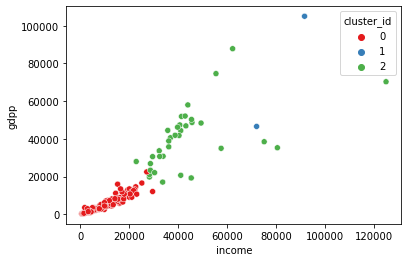

In [35]:
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df_km1, palette='Set1')
plt.show()

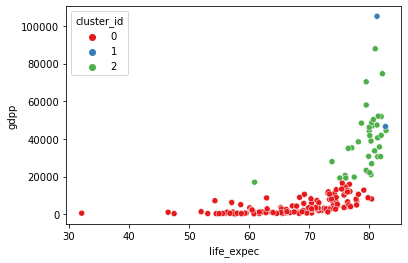

In [36]:
sns.scatterplot(x = 'life_expec', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df_km1, palette='Set1')
plt.show()

#### Profiling k-means cluster

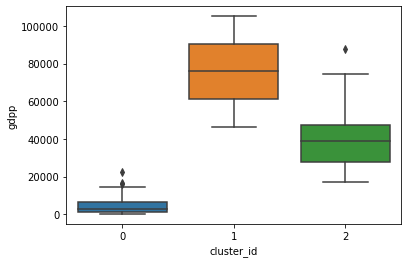

In [37]:
sns.boxplot(data=df_km1,x = 'cluster_id',y='gdpp')
plt.show()

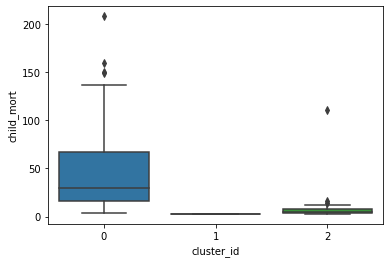

In [38]:
sns.boxplot(data=df_km1,x = 'cluster_id',y='child_mort')
plt.show()

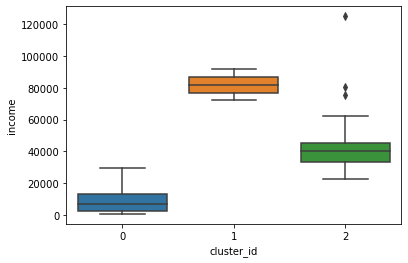

In [39]:
sns.boxplot(data=df_km1,x = 'cluster_id',y='income')
plt.show()

Here cluster_id 0 has the lowest income and hightest child mortality rate with a very a very low gdpp so, this will be our concerned cluster.

In [40]:
#Finding the observations that belong to cluster id 0
df_km1[df_km1['cluster_id']==0]['country']

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 129, dtype: object

In [41]:
top_kmeans = df_km1[df_km1['cluster_id']==0].sort_values(by=["child_mort","gdpp","income"], ascending=[False, True,True])
top_kmeans = top_kmeans.reset_index().drop('index',axis=1)
top_kmeans.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,0
1,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,0
2,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,0
3,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,0
4,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,0
5,Nigeria,130.0,589.490,118.1310,405.420,5150,104.00,60.5,5.84,2330,0
6,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348,0
7,Angola,119.0,2199.190,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
8,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.80,57.5,6.54,334,0
9,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.81,57.9,5.87,575,0


In [42]:
top_kmeans["country"].head(10)

0                       Haiti
1                Sierra Leone
2                        Chad
3    Central African Republic
4                        Mali
5                     Nigeria
6                       Niger
7                      Angola
8            Congo, Dem. Rep.
9                Burkina Faso
Name: country, dtype: object

In [43]:
top_10 = top_kmeans.iloc[:10]
top_10['country'].reset_index().drop('index',axis=1)

,country
0,Haiti
1,Sierra Leone
2,Chad
3,Central African Republic
4,Mali
5,Nigeria
6,Niger
7,Angola
8,"Congo, Dem. Rep."
9,Burkina Faso


These are the top 10 countries we will be focusing on for providing the  help

#### Heirarichal Clustering

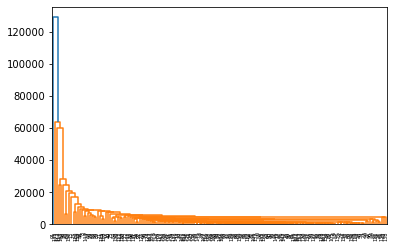

In [44]:
mergings_single = linkage(box_1, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.show()

we will be using complete linkage for further processing.


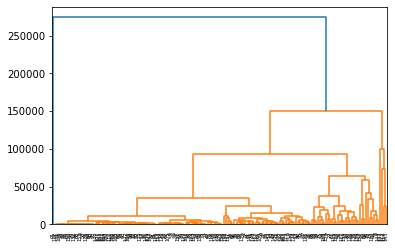

In [45]:
mergings_complete = linkage(box_1, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.show()

looking at this we can say that there are 2 clusters forming with heirarichal clustering.

In [46]:
cluster_labels = cut_tree(mergings_complete, n_clusters=2).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [47]:
df_hm = pd.concat([df_1, pd.Series(cluster_labels)], axis = 1)
df_hm.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_labels']
df_hm.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [48]:
df_hm['cluster_labels'].value_counts()

0    166
1      1
Name: cluster_labels, dtype: int64

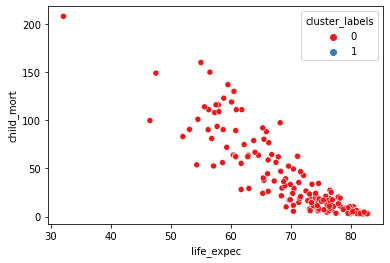

In [49]:
# Here we will be visualizing the clusters formed using hierarichal clustering on life expec
sns.scatterplot(x = 'life_expec', y = 'child_mort', hue ='cluster_labels', legend = 'full', data = df_hm, palette='Set1')
plt.show()

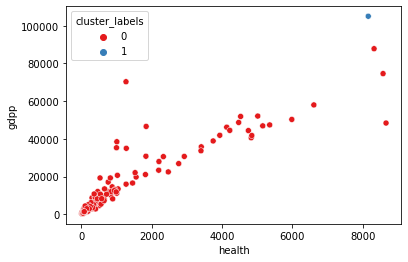

In [50]:
# Here we will be visualizing the clusters formed using hierarichal clustering on health
sns.scatterplot(x = 'health', y = 'gdpp', hue ='cluster_labels', legend = 'full', data = df_hm, palette='Set1')
plt.show()

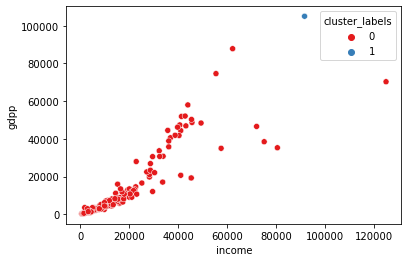

In [51]:
# Here we will be visualizing the clusters formed using hierarichal clustering on income
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_labels', legend = 'full', data = df_hm, palette='Set1')
plt.show()

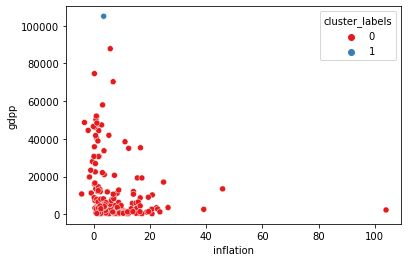

In [52]:
# Here we will be visualizing the clusters formed using hierarichal clustering on inflation
sns.scatterplot(x = 'inflation', y = 'gdpp', hue ='cluster_labels', legend = 'full', data = df_hm, palette='Set1')
plt.show() 

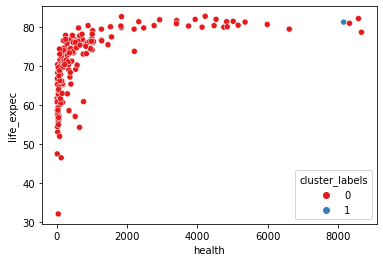

In [53]:
sns.scatterplot(x = 'health', y = 'life_expec', hue ='cluster_labels', legend = 'full', data = df_hm, palette='Set1')
plt.show()

#### Cluster Profiling 

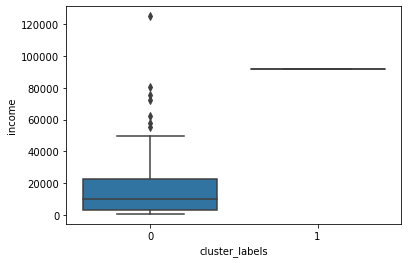

In [54]:
sns.boxplot(data=df_hm,x = 'cluster_labels',y='income')
plt.show()

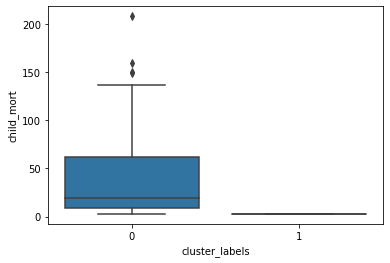

In [55]:
sns.boxplot(data=df_hm,x = 'cluster_labels',y='child_mort')
plt.show()

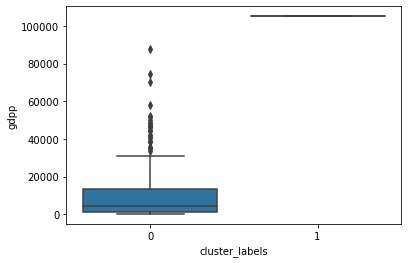

In [56]:
sns.boxplot(data=df_hm,x = 'cluster_labels',y='gdpp')
plt.show()

Here we can cluster_id 0 is having very lowe gdpp and income with a very high child_mort rate so this will be our focus of help

Finding the observations that belong to cluster 0

In [57]:
df_hm[df_hm['cluster_labels']==0]['country']

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 166, dtype: object

In [58]:
top_h = df_hm[df_hm['cluster_labels']==0].sort_values(by=["child_mort","gdpp","income"], ascending=[False, True,True]) 
top_h = top_h.reset_index().drop('index',1)
top_h.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,0
1,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,0
2,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,0
3,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,0
4,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,0
5,Nigeria,130.0,589.490,118.1310,405.420,5150,104.00,60.5,5.84,2330,0
6,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348,0
7,Angola,119.0,2199.190,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
8,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.80,57.5,6.54,334,0
9,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.81,57.9,5.87,575,0


In [59]:
top_h['country'].iloc[:10]

0                       Haiti
1                Sierra Leone
2                        Chad
3    Central African Republic
4                        Mali
5                     Nigeria
6                       Niger
7                      Angola
8            Congo, Dem. Rep.
9                Burkina Faso
Name: country, dtype: object

In [60]:
top_10 = top_h.iloc[:10]
top_10['country'].reset_index().drop('index',axis=1)

,country
0,Haiti
1,Sierra Leone
2,Chad
3,Central African Republic
4,Mali
5,Nigeria
6,Niger
7,Angola
8,"Congo, Dem. Rep."
9,Burkina Faso


These are the top 10 countries obtain from heirarchical clustering we will be focusing on for providing the  help

**Thank You** 